<a href="https://colab.research.google.com/github/mathiasadikpon/AI/blob/main/Week11_Homework_mathias_Adikpon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 11 Homework
In this assignment, we will analyze the Titanic dataset with the Decision Tree model and the Random Forest model.

On April 15, 1912, during her maiden voyage, the widely considered unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

1. Load the data using the code given below. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
titanic_url = "https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv"
titanic = pd.read_csv(titanic_url).drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1).dropna()
titanic['Sex'] = titanic['Sex'].apply(lambda x: int(x == 'male'))
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


The features are:
- Survived: whether the passenger survived. This is the target feature.
- Pclass: the ticket class
- Sex: 0 means female, 1 means male.
- Age
- SibSp: number of siblings / spouses aboard the Titanic
- Parch: number of parents / children aboard the Titanic
- Fare

2. Split the data into training set (80%) and test set (20%)
3. Build a decision tree model on the training set for max_depth = 2, 3, 4. Use the test set to determine which model has the best performance.
4. Use `plot_tree` function from `sklearn` to visualize the best decision tree model. Describe one group of passengers are likely to survive. If the generated graph is too small, you can add the statement `plt.figure(figsize=(12,12))` **before** the `plot_tree` statement to make the graph larger.
5. Build a random forest model with the same `max_depth` value and `n_estimators=100`. Show the accuracy score on the test set.

In [ ]:
# 2. Split the data into training set (80%) and test set (20%)
from sklearn.model_selection import train_test_split
titanic_train, titanic_test = train_test_split(titanic, test_size = 0.2)

In [ ]:
# 3. Build a decision tree model on the training set for max_depth = 2, 3, 4. Use the test set to determine which model has the best performance.
from sklearn.tree import DecisionTreeClassifier
input_cols = titanic_train.columns[1:]
X = titanic_train.loc[:, input_cols]
y = titanic_train['Survived']

#Build a decision tree model on the training set for max_depth = 2
tree_clf_2 = DecisionTreeClassifier(max_depth=2,
                                  random_state=42)
tree_clf_2.fit(X, y)

#Build a decision tree model on the training set for max_depth = 3
tree_clf_3 = DecisionTreeClassifier(max_depth=3,
                                  random_state=42)
tree_clf_3.fit(X, y)

#Build a decision tree model on the training set for max_depth = 4
tree_clf_4 = DecisionTreeClassifier(max_depth=4,
                                  random_state=42)
tree_clf_4.fit(X, y)




DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
#Use the test set to determine which model has the best performance.
from sklearn.metrics import accuracy_score
score_dict = dict()
prediction2= tree_clf_2.predict(titanic_test[input_cols])
prediction3 = tree_clf_3.predict(titanic_test[input_cols])
prediction4= tree_clf_4.predict(titanic_test[input_cols])
score_dict[2] = accuracy_score(titanic_test['Survived'], prediction2)
score_dict[3] = accuracy_score(titanic_test['Survived'], prediction3)
score_dict[4] = accuracy_score(titanic_test['Survived'], prediction4)

print("Accuracy score for max_depth = 2 is :", score_dict[2])
print("Accuracy score for max_depth = 3 is :", score_dict[3])
print("Accuracy score for max_depth = 4 is :", score_dict[4])

max_score = score_dict[2]

print('The  model that has the best performance is the model with max_depth =', end = " ")
for m in score_dict.values():
  if m > max_score:
    max_score = m

for k in score_dict.keys():
  if score_dict[k] == max_score:
    print(k, end= ' ')

Accuracy score for max_depth = 2 is : 0.7902097902097902
Accuracy score for max_depth = 3 is : 0.8321678321678322
Accuracy score for max_depth = 4 is : 0.8111888111888111
The  model that has the best performance is the model with max_depth = 3 

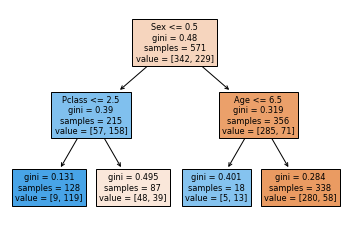

In [ ]:
# 4. Use plot_tree function from sklearn to visualize the best decision tree model. Describe one group of passengers are likely to survive. If the generated graph is too small, you can add the statement plt.figure(figsize=(12,12)) before the plot_tree statement to make the graph larger.

# Visualize the decision tree
from sklearn.tree import plot_tree
# max_depth = 2
plot_tree(tree_clf_2, feature_names=X.columns, filled=True)
plt.show()

From max_depth = 2, the group of passengers that are likely to survive is people of age greater than 6.5

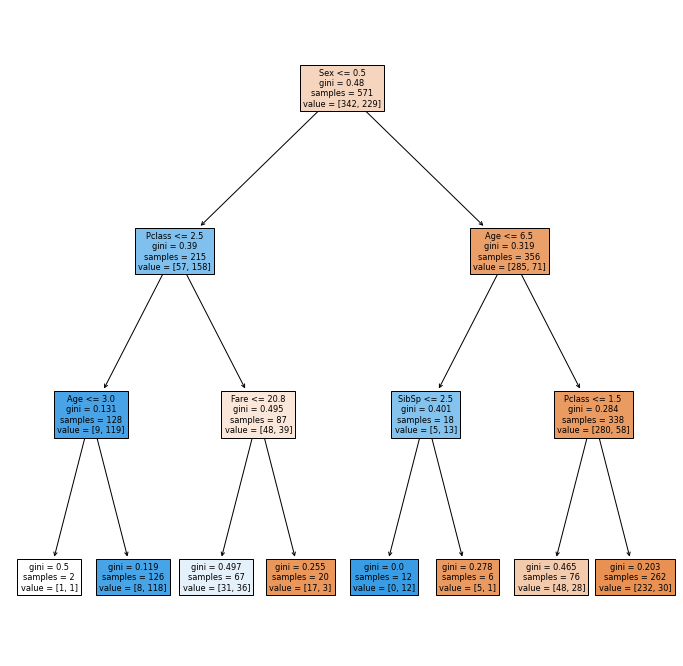

In [ ]:
# max_depth = 3
plt.figure(figsize=(12,12))
plot_tree(tree_clf_3, feature_names=X.columns, filled=True)
plt.show()

From model with max_depth = 3, the group of passengers that are likely to survive are people of age greater than 6.5 with the ticket class greater than 1.5

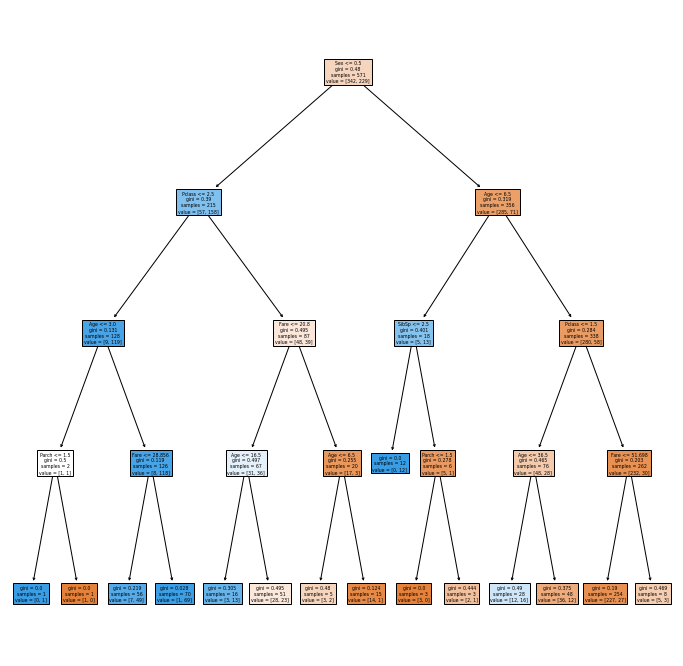

In [ ]:
# max_depth = 4
plt.figure(figsize=(12,12))
plot_tree(tree_clf_4, feature_names=X.columns, filled=True)
plt.show()

 From model with max_depth = 4, the group of passengers that are likely to survive are people of age greater than 6.5 with the ticket class greater than 1.5 with fare greater than 51.696.

In [ ]:
# 5. Build a random forest model with the same max_depth value and n_estimators=100. Show the accuracy score on the test set.

# Build a random forest model with the same max_depth value and n_estimators=100
from sklearn.ensemble import RandomForestClassifier
input_cols = titanic_train.columns[1:]
X = titanic_train.loc[:, input_cols]
y = titanic_train['Survived']

#max_depth = 2
rf_clf_2 = RandomForestClassifier(
    n_estimators=100,
    max_depth=2,
    n_jobs=-1
)
rf_clf_2.fit(X, y)

#max_depth = 3
rf_clf_3 = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    n_jobs=-1
)
rf_clf_3.fit(X, y)

#max_depth = 4
rf_clf_4 = RandomForestClassifier(
    n_estimators=100,
    max_depth=4,
    n_jobs=-1
)
rf_clf_4.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
# Show the accuracy score on the test set

from sklearn.metrics import accuracy_score
prediction2= rf_clf_2.predict(titanic_test[input_cols])
prediction3= rf_clf_3.predict(titanic_test[input_cols])
prediction4 = rf_clf_4.predict(titanic_test[input_cols])


print("Accuracy score for random forest model with  max_depth = 2 is :", accuracy_score(titanic_test['Survived'], prediction2))
print("Accuracy score for random forest model with  max_depth = 3 is :", accuracy_score(titanic_test['Survived'], prediction3))
print("Accuracy score for random forest model with  max_depth = 4 is :", accuracy_score(titanic_test['Survived'], prediction4))


Accuracy score for random forest model with  max_depth = 2 is : 0.7902097902097902
Accuracy score for random forest model with  max_depth = 3 is : 0.8181818181818182
Accuracy score for random forest model with  max_depth = 4 is : 0.8111888111888111
